#IMAGE CLASSIFICATION

In [2]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 26kB/s 
     |████████████████████████████████| 3.1MB 34.6MB/s 
     |████████████████████████████████| 501kB 49.8MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [65]:
from __future__ import absolute_import,division,print_function,unicode_literals

#tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.0.0-beta1


In [0]:
#import the fashion mnist dataset

In [0]:
#this guide uses mnist dataset which contain 70000 grayscale images in 10 categories. the images should individuals article of clothing

In [6]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#the images are 28*28 numpy array with pixels value ranges from 0 to 255 . labels are array of integer 0 to 9.
#

In [0]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [0]:
#explore the data

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [0]:
#preprocess the data

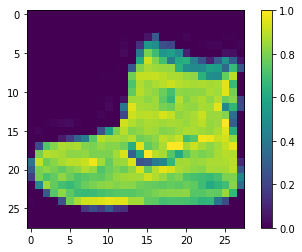

In [69]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

In [0]:
#to verify data is in correct format and that we aready to build and train the network. 
#lets display the first 25 images from the training set and display the class name below each image

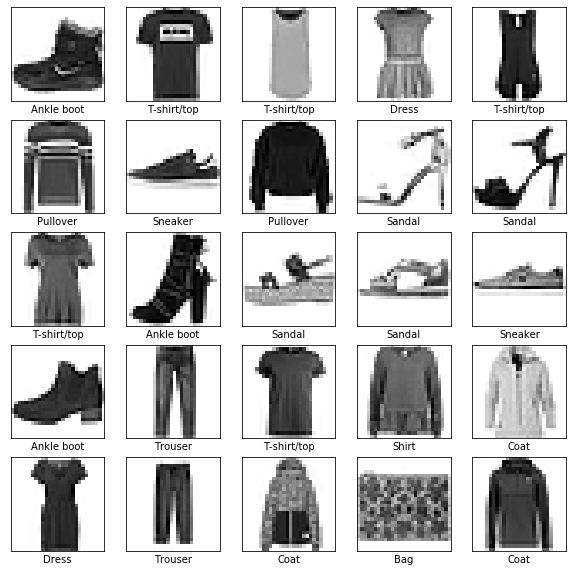

In [71]:
plt.figure(figsize=(10,10))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#build the model

building the neural network require configuring the layers of model,then compiling the model.

In [0]:
#set up the layers


basic building block of neural network is layer,layer extract representation the data fed into them.

In [0]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128,activation="relu"),
                         keras.layers.Dense(10,activation="softmax")
])

first layer in this network tf.keras.layers.Flatten transforms the format of the imagesfrom a 2-d array(of 28 x 28 pixels)to one -d array (of 28*28=784 pixels).Think of this layer as unstacking rows of pixels in the image and lining them up.This layer has no parameter tom learn ,it only reformats the data .
After the pixels are flattened ,the network consist of a sequence of two tf.keras.Dense.layers.these are densely connected or fully connected neural layers,the first dense layer has 128 nodes.The second layr is a 10 node softmax layer that return  an array of probability scoresthat sum to 1.Each node contains a score that indicates the probability that the current images belong to one of 10 classes.

In [0]:
#compile the model
#loss function-
#optimizer-
#metrics- used to monitor 

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [0]:
#train the model

training the model require following steps:


In [29]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4966 - accuracy: 0.8244
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3757 - accuracy: 0.8625
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3382 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3130 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2961 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2809 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2682 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2581 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2472 - accuracy: 0.9069
Epoch 10/10
60

In [0]:
# evaluate accuracy

In [72]:
test_loss,test_acc= model.evaluate(test_images,test_labels)
print("\ntest accuracy",test_acc)
print(test_loss)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3356 - accuracy: 0.8834

test accuracy 0.8834
0.3355941911220551


In [0]:
predictions= model.predict(test_images)

In [33]:
predictions[0]

array([8.4129670e-06, 7.1580413e-09, 8.3642577e-09, 1.5665143e-11,
       6.9194686e-09, 9.6899539e-04, 1.3801750e-06, 1.6418058e-02,
       4.9106807e-06, 9.8259819e-01], dtype=float32)

In [34]:
np.max(predictions[0])

0.9825982

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color="blue"
  else:
    color="red"  

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)  

In [0]:
def plot_value_array(i,predictions_array,true_label):
   predictions_array,true_label=predictions_array[i],true_label[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   thisplot=plt.bar(range(10),predictions_array,color="#777777")
   plt.ylim([0,1])
   predicted_label= np.argmax(predictions_array)

   thisplot[predicted_label].set_color("red")
   thisplot[true_label].set_color("blue")



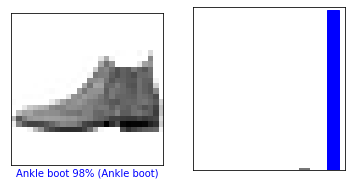

In [52]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

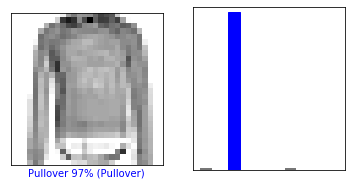

In [53]:
i=16
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

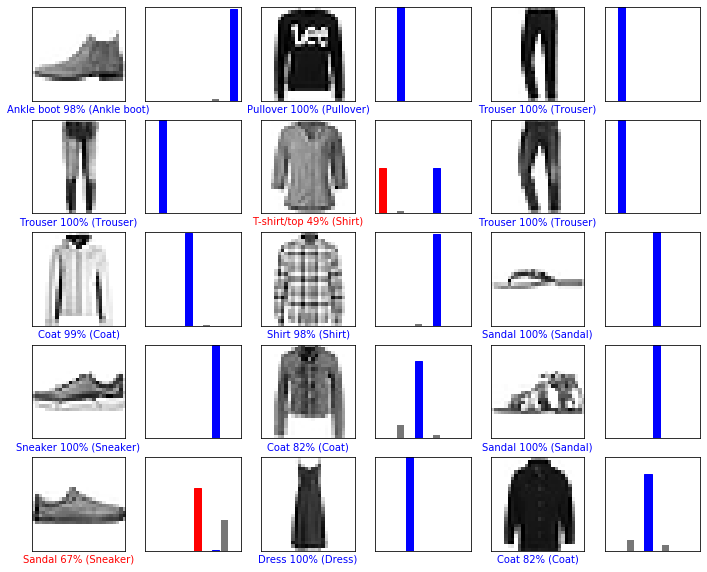

In [54]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)  
  plot_value_array(i,predictions,test_labels)
plt.show () 

In [59]:
img=test_images[0]
print(img.shape)

(28, 28)


In [60]:
img=(np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [61]:
predictions_single=model.predict(img)
print(predictions_single)

[[8.4129424e-06 7.1580004e-09 8.3642417e-09 1.5665053e-11 6.9194290e-09
  9.6899353e-04 1.3801737e-06 1.6418051e-02 4.9106620e-06 9.8259819e-01]]


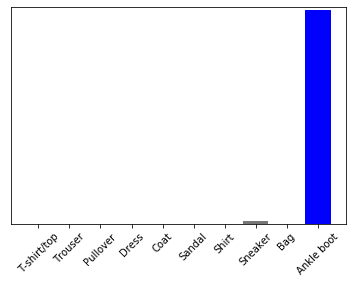

In [62]:
plot_value_array(0,predictions_single,test_labels)
_ =plt.xticks(range(10),class_names,rotation=45)

In [64]:
np.argmax(predictions_single[0])

9